In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/nodejs scripts/IMDb Movies India.csv", encoding='cp1252')

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [9]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

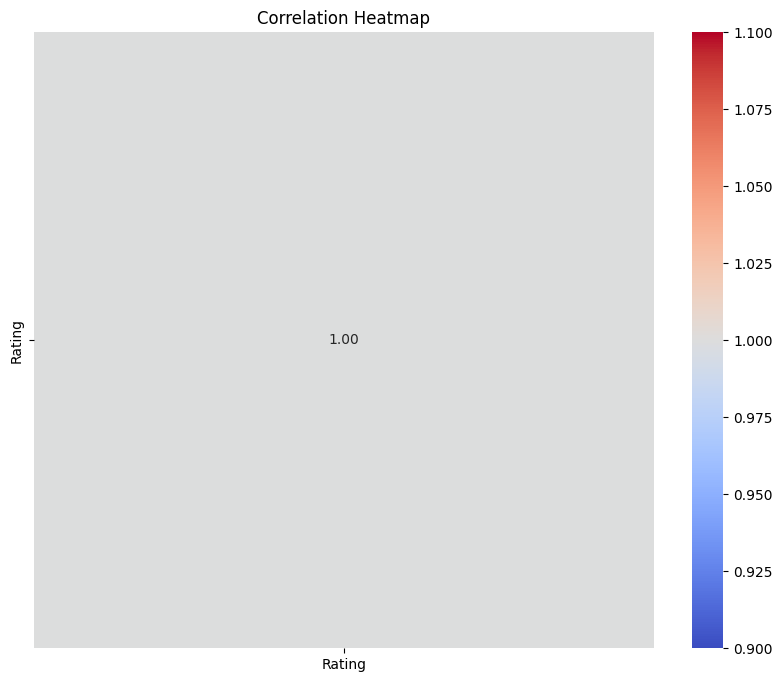

In [11]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df = df.drop(columns=['id', 'url'], errors='ignore')

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

In [16]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,Unknown,Unknown,Drama,6.0,Unknown,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",6.0,Unknown,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,6.0,Unknown,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [19]:
df['release_year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year

C:\Users\pasam\AppData\Local\Temp\ipykernel_21780\725278488.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year


In [20]:
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float, errors='ignore')

In [21]:
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float, errors='ignore')

In [53]:
df.tail()

,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,release_year,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
15504,Zulm Ko Jala Doonga,131.0,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,NaN,1,...,0,0,0,0,0,0,0,0,0,0
15505,Zulmi,129.0,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,NaN,1,...,0,0,0,0,0,0,0,0,0,0
15506,Zulmi Raj,131.0,6.0,35.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,NaN,1,...,0,0,0,0,0,0,0,0,0,0
15507,Zulmi Shikari,131.0,6.0,35.0,Unknown,Unknown,Unknown,Unknown,NaN,1,...,0,0,0,0,0,0,0,0,0,0
15508,Zulm-O-Sitam,130.0,6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
genre_dummies = df['Genre'].str.get_dummies(sep=', ')
df = pd.concat([df, genre_dummies], axis=1)

In [23]:
df = df.drop(columns=['Year', 'Genre'], errors='ignore')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          15509 non-null  object 
 1   Duration      15509 non-null  float64
 2   Rating        15509 non-null  float64
 3   Votes         15509 non-null  float64
 4   Director      15509 non-null  object 
 5   Actor 1       15509 non-null  object 
 6   Actor 2       15509 non-null  object 
 7   Actor 3       15509 non-null  object 
 8   release_year  0 non-null      float64
 9   Action        15509 non-null  int64  
 10  Adventure     15509 non-null  int64  
 11  Animation     15509 non-null  int64  
 12  Biography     15509 non-null  int64  
 13  Comedy        15509 non-null  int64  
 14  Crime         15509 non-null  int64  
 15  Documentary   15509 non-null  int64  
 16  Drama         15509 non-null  int64  
 17  Family        15509 non-null  int64  
 18  Fantasy       15509 non-nu

In [24]:
categorical_features = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']
numeric_features = ['Duration', 'Votes', 'release_year']

In [25]:
X = df[categorical_features + numeric_features]
y = df['Rating']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,Director,Actor 1,Actor 2,Actor 3,Duration,Votes,release_year
3485,Mahesh Bhatt,Sushmita Sen,Mukul Dev,Sharad S. Kapoor,141.0,293.0,NaN
8701,Kundan Kumar,Mala Sinha,Ajit,Kewal Kumar,131.0,5.0,NaN
11179,Rudra Patla Venugopal,Chitram Basha,Udita Goswami,Faheem Ul Haq,116.0,5.0,NaN
11628,Shantilal Soni,Jairaj,Pallavi Joshi,Lalita Pawar,90.0,5.0,NaN
4819,Anand Kumar,Sulochana Latkar,Shahu Modak,Nana Palsikar,131.0,35.0,NaN


In [38]:
y_train.head()

3485     4.7
8701     5.2
11179    3.6
11628    7.6
4819     6.0
Name: Rating, dtype: float64

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [43]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [ ]:
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)


In [47]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['release_year']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['release_year']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Mean Squared Error: 0.8571633384912961
R^2 Score: 0.11851630337943764


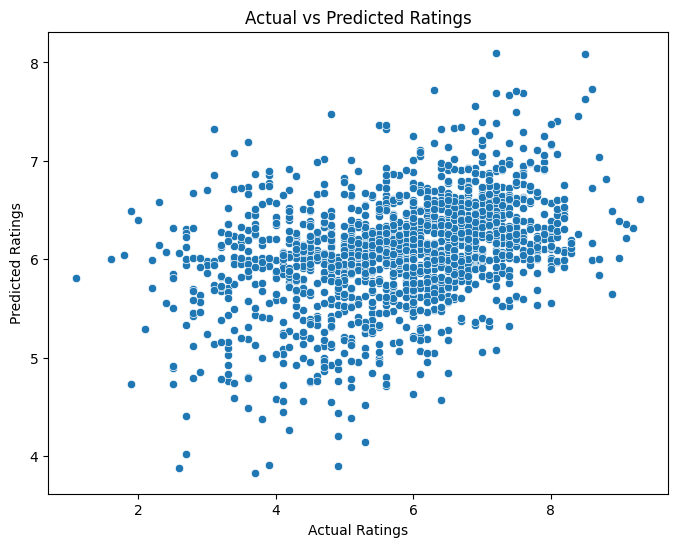

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()